google colab に対して google drive にアクセスする許可を与えてください

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


colab の /content/drive/MyDrive が, 自分の google drive の マイドライブ になります。
google drive で YOLO というフォルダーを作成してください。

In [2]:
%mkdir /content/drive/MyDrive/YOLO/
%cd  /content/drive/MyDrive/YOLO/

mkdir: cannot create directory ‘/content/drive/MyDrive/YOLO/’: File exists
/content/drive/MyDrive/YOLO


In [3]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
%pip install -qr yolov5/requirements.txt

     |████████████████████████████████| 1.6 MB 43.3 MB/s 


In [5]:
%cd /content/drive/MyDrive/YOLO/yolov5

/content/drive/MyDrive/YOLO/yolov5


In [6]:
!python detect.py --source https://github.com/takanori-ugai/KGRC-ws-2022-fork/raw/main/notebooks/dogcat.jpg

detect: weights=yolov5s.pt, source=https://github.com/takanori-ugai/KGRC-ws-2022-fork/raw/main/notebooks/dogcat.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
100% 212k/212k [00:00<00:00, 51.4MB/s]
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/YOLO/yolov5/dogcat.jpg: 416x640 1 cat, 1 dog, 19.2ms
Speed: 0.5ms pre-process, 19.2ms inference, 34.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


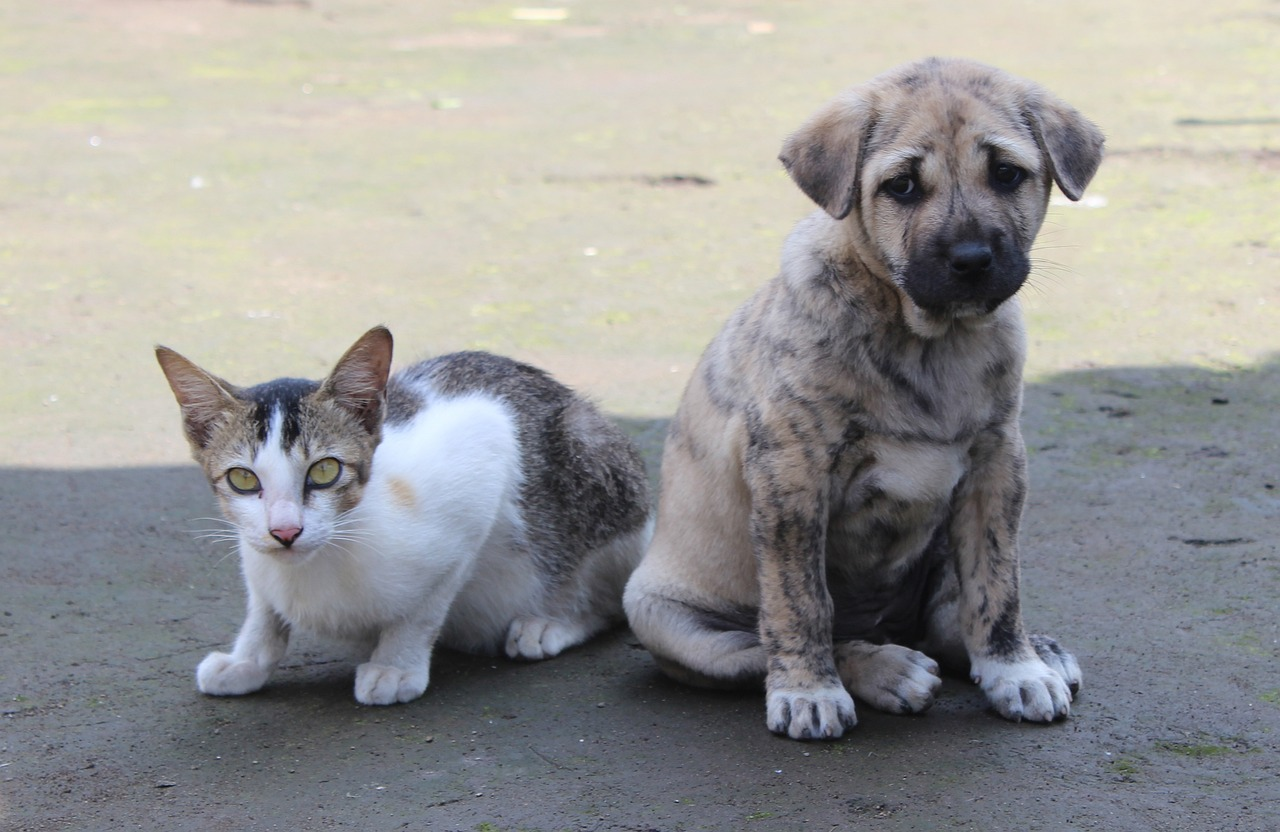

In [9]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('/content/drive/MyDrive/YOLO/yolov5/dogcat.jpg'))

以下の結果ファイルの場所は、自分の実行結果に示されるもので置き換える。

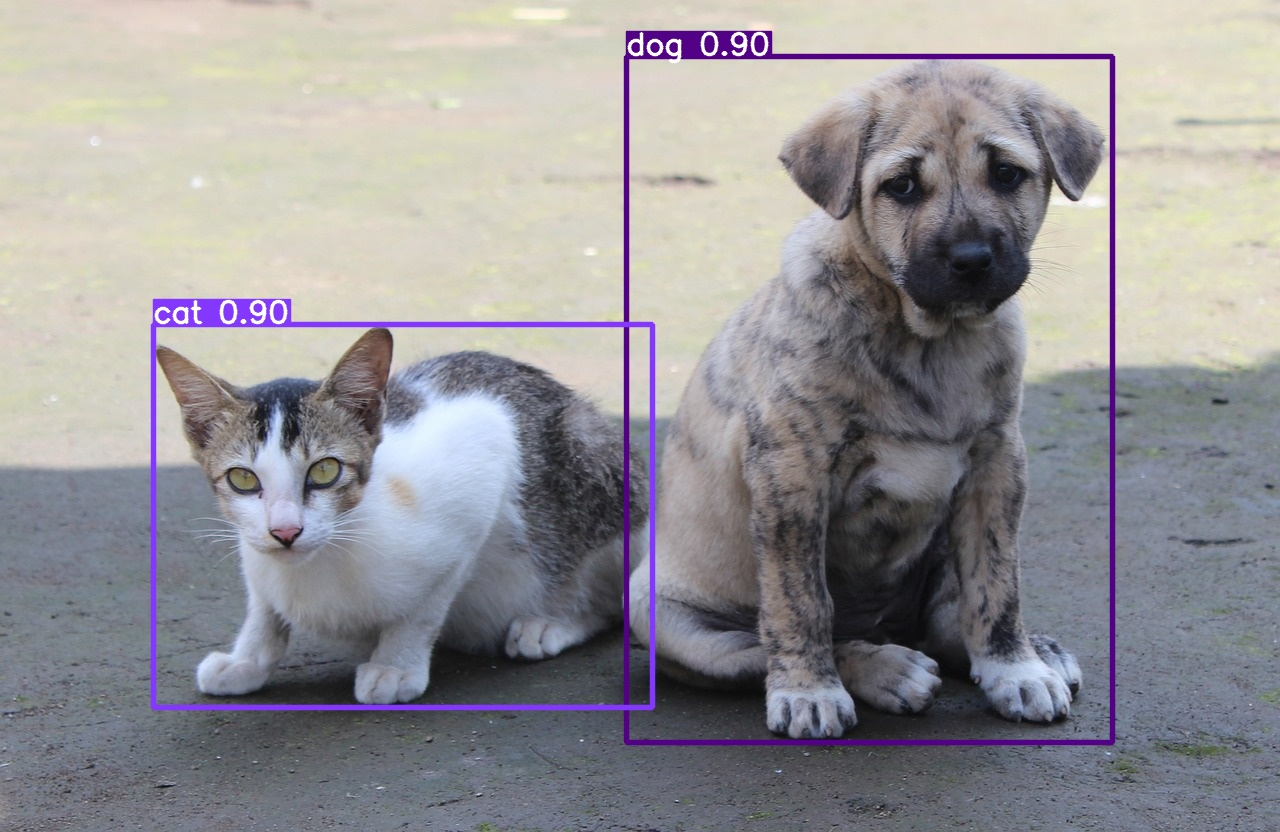

In [10]:
display_jpeg(Image('/content/drive/MyDrive/YOLO/yolov5/runs/detect/exp5/dogcat.jpg'))

In [7]:
!python detect.py --source https://github.com/KnowledgeGraphJapan/KGRC-RDF/raw/kgrc4si/Movie/Admire_paintings0.mp4

detect: weights=yolov5s.pt, source=https://github.com/KnowledgeGraphJapan/KGRC-RDF/raw/kgrc4si/Movie/Admire_paintings0.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Found https://github.com/KnowledgeGraphJapan/KGRC-RDF/raw/kgrc4si/Movie/Admire_paintings0.mp4 locally at Admire_paintings0.mp4
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
video 1/1 (1/147) /content/drive/MyDrive/YOLO/yolov5/Admire_paintings0.mp4: 480x640 1 person, 1 tv, 1 remote, 13.2ms
video 1/1 (2/147) /content/drive/MyDrive/YOLO/yolov5/Admire_paintings

In [3]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/drive/MyDrive/YOLO/yolov5/Admire_paintings0.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [4]:
mp42 = open('/content/drive/MyDrive/YOLO/yolov5/runs/detect/exp6/Admire_paintings0.mp4', 'rb').read()
data_url2 = 'data:video/mp4;base64,' + b64encode(mp42).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url2}" type="video/mp4">
</video>""")

In [3]:
! pip install imageio-ffmpeg
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 動画をアニメに変換
def video_anime(video):
    video = imageio.mimread(video)   # フレームにばらす
    fig = plt.figure(figsize=(10,10))  # 表示サイズ指定

    mov = []
    for i in range(len(video)):  # フレームを1枚づつmovにアペンド
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    # アニメーション作成        
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)
    plt.close()
    return anime

# HTML5でアニメをインラインに動画表示 
HTML(video_anime('/content/drive/MyDrive/YOLO/yolov5/runs/detect/exp6/Admire_paintings0.mp4').to_html5_video()) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.4 MB/s 
